## Create and preprocess train, validation and test data

* resize images to avg height, width 
* greyscale transformation
* create input and label arrays



In [12]:
import cv2 
import os 
import numpy as np 
from random import shuffle 
from tqdm import tqdm 
import random
import re 
import matplotlib.pyplot as plt

In [2]:
os.chdir('E:\Babette\MasterThesis\Data')

In [3]:
# directories
train_dir = os.path.join("E:\Babette\MasterThesis\Classes_upsampl", 'Train') 
val_dir= os.path.join("E:\Babette\MasterThesis\Classes_upsampl", 'Validation')
test_dir = os.path.join("E:\Babette\MasterThesis\Classes_upsampl", 'Test') 


In [4]:
##find avg shape to resize images

train_dir = os.path.join("E:\Babette\MasterThesis\Classes_upsampl", 'Train') 
validation_dir = os.path.join("E:\Babette\MasterThesis\Classes_upsampl", 'Validation')

avg_height = 0
avg_width = 0
total_train = 0

for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    class_images = os.listdir(class_path)

    for img_name in class_images:
        h, w, c = cv2.imread(os.path.join(class_path, img_name)).shape
        avg_height += h
        avg_width += w

    total_train += len(class_images)
    
IMG_HEIGHT= avg_height//total_train
IMG_WIDTH= avg_width//total_train

#save values
shape = [IMG_HEIGHT, IMG_WIDTH]
np.save('shape.npy', shape) 

In [6]:
#labels

def label_img(path): 
    word_label = path.split('\\')[-2] 
    if word_label == 'TABLE': return [1, 0] 
    elif word_label == 'OTHER': return [0, 1] 

In [22]:
# create data
def create_train_data(train_dir, train): 
    training_data = [] 
    images_path =[]
    
    for class_name in os.listdir(train_dir):
        class_path = os.path.join(train_dir, class_name)
        for class_images in os.listdir(class_path):
            images_path.append(os.path.join(class_path, class_images))
    
    # loading the training data 
    
    for path in tqdm(images_path): 
  
        # labeling the images 
        label = label_img(path) 
  
        # loading the image from the path and then converting them into 
        # greyscale, cv2.IMREAD_GRAYSCALE option for 1 channel
        img = cv2.imread(path) 
        
        #greyscale 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
        # resizing the image
        img = cv2.resize(img, (IMG_WIDTH,IMG_HEIGHT)) 
  
        #training data list with numpy array of the images 
        training_data.append([np.array(img), np.array(label)]) 
  
    # shuffling of the training data to preserve the random state of our data 
    shuffle(training_data) 
  
    # saving our trained data for further uses if required 
    name = train + '_data.npy'
    np.save(name , training_data) 
    return training_data 

In [8]:
#preprocessing test data
def process_test_data(): 
    testing_data = [] 
    images_path =[]
    for class_name in os.listdir(test_dir):
        class_path = os.path.join(train_dir, class_name)
        for class_images in os.listdir(class_path):
            images_path.append(os.path.join(class_path, class_images))
 
    for path in tqdm(images_path): 
        
        img_num = path.split('\\')[-1]
        img_id = re.sub(r"id_","", img_num)
        img_id = re.sub(r".jpg","", img_id)
        #img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img = cv2.imread(path) 
        #greyscale
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, ( IMG_WIDTH, IMG_HEIGHT)) 
        testing_data.append([np.array(img), img_id]) 
          
    shuffle(testing_data) 
    np.save('test_data.npy', testing_data) 
    return testing_data 


In [23]:
train_data = create_train_data(train_dir, "train") 
val_data = create_train_data(val_dir, "val")
 
# train_data = np.load('train_data.npy') 
# val_data = np.load('val_data.npy') 


100%|██████████| 660/660 [00:27<00:00, 24.13it/s]


In [18]:
test_data = create_train_data(test_dir, "test") 
#test_data = process_test_data() 
# test_data = np.load('test_data.npy') 

100%|██████████| 589/589 [00:05<00:00, 109.49it/s]


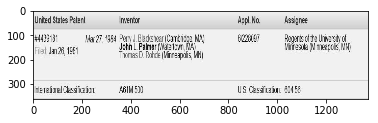

(360, 1372)


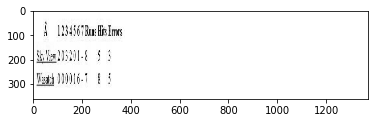

(360, 1372)


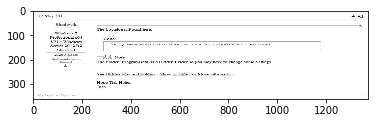

(360, 1372)


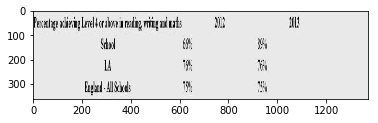

(360, 1372)


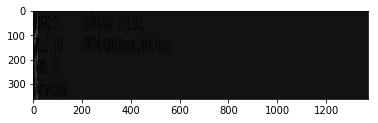

(360, 1372)


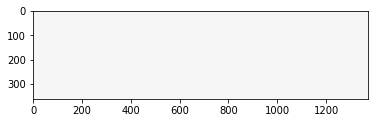

(360, 1372)


In [26]:
for i in train_data[0:6]:
    plt.imshow(i[0], cmap='gray', vmin = 0, vmax = 255)
    plt.show()
    print(i[0].shape)